In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [30]:

def radially_symmetric_rose_diagram(azimuths, max_radial_grid, radial_grid_increment, label_loc=0):
   '''Radially symmetric rose diagram suitable for strikes or drilling induced damage azimuths'''
   
   # Calculate the number of directions (strikes) every 10° using numpy.histogram
   bin_edges = np.arange(-5, 366, 10) 
   number_of_strikes, bin_edges = np.histogram(azimuths, bin_edges) 
   
   # Sum the last value with the first value.
   number_of_strikes[0] += number_of_strikes[-1]
   
   # Sum the first half 0-180° with the second half 180-360° 
   # to achieve the "mirrored behavior" of Rose Diagrams.
   half = np.sum(np.split(number_of_strikes[:-1], 2), 0)
   two_halves = np.concatenate([half, half])
   
   # Make the plot
   fig = plt.figure(figsize=(10,10))

   ax = fig.add_subplot(122, projection='polar')
   
   ax.bar(
      np.deg2rad(np.arange(0, 360, 10)), 
      two_halves, 
      width=np.deg2rad(10),
      bottom=0.0,
      color='.8',
      edgecolor='k',
      zorder=10
   )

   ax.set_theta_zero_location('N')
   ax.set_theta_direction(-1)

   ax.set_thetagrids(np.arange(0, 360, 45), labels=np.arange(0, 360, 45))

   ax.set_rgrids(np.arange(0, max_radial_grid, radial_grid_increment), angle=label_loc)

   print(number_of_strikes, bin_edges)

In [44]:

def rose_diagram(azimuths, max_radial_grid, radial_grid_increment, label_loc=0):
   '''Radially symmetric rose diagram suitable for strikes or drilling induced damage azimuths'''
   
   # Calculate the number of directions (strikes) every 10° using numpy.histogram
   bin_edges = np.arange(-5, 366, 10) 
   number_of_strikes, bin_edges = np.histogram(azimuths, bin_edges) 

   print(len(number_of_strikes), len(bin_edges), len(np.deg2rad(np.arange(0, 360, 10))))

   print(number_of_strikes)

   # Sum the last value with the first value.
   number_of_strikes[0] += number_of_strikes[-1]

   print(number_of_strikes)

   # drop the last value from the list number_of_strikes
   number_of_strikes = number_of_strikes[:-1]
   
   # Make the plot
   fig = plt.figure(figsize=(10,10))

   ax = fig.add_subplot(122, projection='polar')
   
   ax.bar(
      np.deg2rad(np.arange(0, 360, 10)), 
      number_of_strikes, 
      width=np.deg2rad(10),
      bottom=0.0,
      color='.8',
      edgecolor='k',
      zorder=10
   )

   ax.set_theta_zero_location('N')
   ax.set_theta_direction(-1)

   ax.set_thetagrids(np.arange(0, 360, 45), labels=np.arange(0, 360, 45))

   ax.set_rgrids(np.arange(0, max_radial_grid, radial_grid_increment), angle=label_loc)

   print(number_of_strikes, bin_edges)

In [26]:
picks = pd.read_csv('1_Pre-processed data.csv')
fractures = picks[(picks['type'] == 'Conductive, HC') | (picks['type'] == 'Conductive, LC')].copy()

[32 40 21  3  3  0  4  0  2  1  1  1  1  0  2  4  7 23 36 24 12  3  1  0
  2  0  0  2  1  5  1  0  1  1  0  8  9] [ -5   5  15  25  35  45  55  65  75  85  95 105 115 125 135 145 155 165
 175 185 195 205 215 225 235 245 255 265 275 285 295 305 315 325 335 345
 355 365]


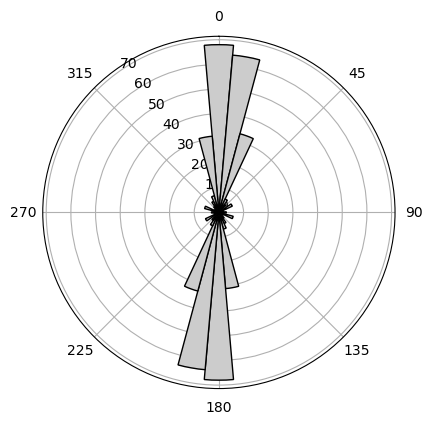

In [27]:
# 

fig = radially_symmetric_rose_diagram(
    fractures.dip_az.values, 
    80, # maximum radial grid value
    10, # increment for radial grid
    label_loc=325, # grid label location
    )


In [24]:
# number of values
fractures.shape

(242, 8)

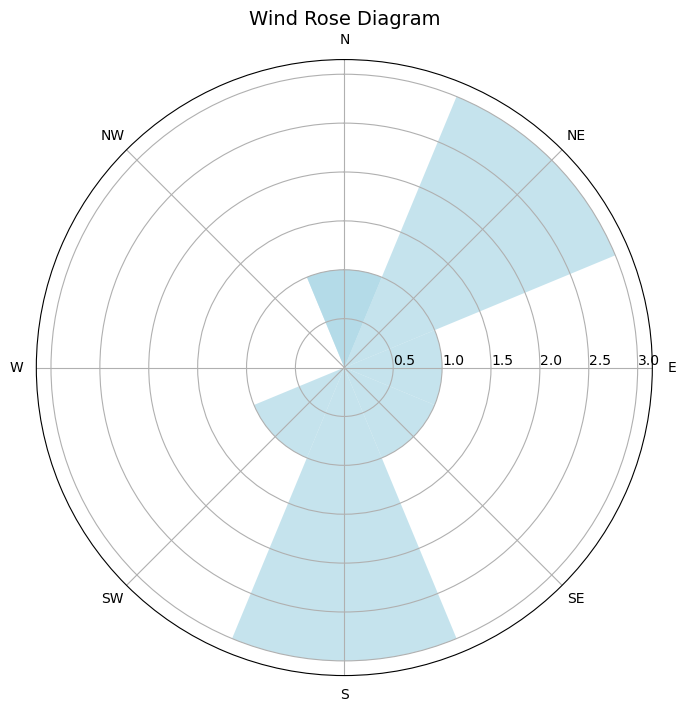

In [51]:


# Sample wind data (directions in degrees)
dip_azs = np.array([30, 45, 60, 75, 120, 150, 180, 200, 220, 250])

def rose_diagram(azumuths):

    # Create a histogram of wind directions
    n, bins = np.histogram(azumuths, bins=np.arange(0, 361, 45))

    # Convert wind directions to radians
    directions_rad = np.deg2rad(bins)

    # Create a polar plot
    plt.figure(figsize=(8, 8))
    ax = plt.subplot(111, polar=True)

    # Plot the wind rose
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.set_rlabel_position(90)
    ax.set_xticks(np.arange(0, 2*np.pi, np.pi/4))
    ax.set_xticklabels(['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW'])


    # Plot the bars representing wind frequencies
    bars = ax.bar(directions_rad, np.append(n, n[0]), width=np.deg2rad(45), bottom=0.0, color='lightblue', alpha=0.7)


    # Add a title
    plt.title("Wind Rose Diagram", fontsize=14)



